In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=80abdbfb9d1ef0c72f11dcc1eb06b2286ed08bd1d124b5e670b2fb695510103d
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=aea9b84b9484dd8b2b2ab3d638b09c16267141d2cbeb57e156b5905952cd9ee5
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# preprocessing
import re
import string
import itertools # for flattening
# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer as wn
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# sklearn library
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=aa4d7155adb38aa09c6eb83d37817a24112c76d5910bd0069c1ba2bd9961e1cf
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=cebbe4c878a7d7ad4ec4c0c6caabc4ba7650d79ad94f3aa774b9d398963ac016
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0

In [ ]:
pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [ ]:
import gensim
from gensim import models, interfaces, utils
from gensim.models import Nmf

In [ ]:
data=pd.read_csv('/content/sample_data/dice_com-job_us_sample.csv')

In [ ]:
data.head()

advertiserurl  \
0  https://www.dice.com/jobs/detail/AUTOMATION-TE...   
1  https://www.dice.com/jobs/detail/Information-S...   
2  https://www.dice.com/jobs/detail/Business-Solu...   
3  https://www.dice.com/jobs/detail/Java-Develope...   
4  https://www.dice.com/jobs/detail/DevOps-Engine...   

                             company  \
0  Digital Intelligence Systems, LLC   
1  University of Chicago/IT Services   
2               Galaxy Systems, Inc.   
3                      TransTech LLC   
4                   Matrix Resources   

                            employmenttype_jobstatus  \
0  C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...   
1                                          Full Time   
2                                          Full Time   
3                                          Full Time   
4                                          Full Time   

                                      jobdescription               jobid  \
0  Looking for Selenium engineers...must have sol...  Dice Id : 10110693   
1  The University of Chicago has a rapidly growin...  Dice Id : 10114469   
2  GalaxE.SolutionsEvery day, our solutions affec...  Dice Id : CXGALXYS   
3  Java DeveloperFull-time/direct-hireBolingbrook...  Dice Id : 10113627   
4  Midtown based high tech firm has an immediate ...  Dice Id : matrixga   

  joblocation_address                                           jobtitle  \
0         Atlanta, GA                           AUTOMATION TEST ENGINEER   
1         Chicago, IL                      Information Security Engineer   
2      Schaumburg, IL                       Business Solutions Architect   
3     Bolingbrook, IL  Java Developer (mid level)- FT- GREAT culture,...   
4         Atlanta, GA                                    DevOps Engineer   

         postdate                                            shift site_name  \
0      1 hour ago  Telecommuting not available|Travel not required       NaN   
1      1 week ago  Telecommuting not available|Travel not required       NaN   
2     2 weeks ago  Telecommuting not available|Travel not required       NaN   
3     2 weeks ago  Telecommuting not available|Travel not required       NaN   
4  48 minutes ago  Telecommuting not available|Travel not required       NaN   

                                              skills  \
0                                          SEE BELOW   
1  linux/unix, network monitoring, incident respo...   
2  Enterprise Solutions Architecture, business in...   
3                         Please see job description   
4  Configuration Management, Developer, Linux, Ma...   

                            uniq_id  
0  418ff92580b270ef4e7c14f0ddfc36b4  
1  8aec88cba08d53da65ab99cf20f6f9d9  
2  46baa1f69ac07779274bcd90b85d9a72  
3  3941b2f206ae0f900c4fba4ac0b18719  
4  45efa1f6bc65acc32bbbb953a1ed13b7

In [ ]:
data.shape

(22000, 12)

In [ ]:
data.describe()

advertiserurl      company  \
count                                               22000        21950   
unique                                              22000         4291   
top     https://www.dice.com/jobs/detail/AUTOMATION-TE...  CyberCoders   
freq                                                    1          335   

       employmenttype_jobstatus  \
count                     21770   
unique                     2927   
top                   Full Time   
freq                       6734   

                                           jobdescription               jobid  \
count                                               22000               22000   
unique                                              20515                4415   
top     Title IT Security Analyst – Threats and Vulner...  Dice Id : cybercod   
freq                                                   10                 335   

       joblocation_address        jobtitle     postdate  \
count                21997           22000        22000   
unique                1581           15242           93   
top           New York, NY  Java Developer  2 weeks ago   
freq                  1368             174         3149   

                                                  shift     site_name  \
count                                             21643          3490   
unique                                               20             1   
top     Telecommuting not available|Travel not required  www.dice.com   
freq                                              20305          3490   

                                                 skills  \
count                                             21957   
unique                                            18972   
top     Telecommuting not available Travel not required   
freq                                                141   

                                 uniq_id  
count                              22000  
unique                             22000  
top     418ff92580b270ef4e7c14f0ddfc36b4  
freq                                   1

In [ ]:
data=data.drop('site_name',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             22000 non-null  object
 1   company                   21950 non-null  object
 2   employmenttype_jobstatus  21770 non-null  object
 3   jobdescription            22000 non-null  object
 4   jobid                     22000 non-null  object
 5   joblocation_address       21997 non-null  object
 6   jobtitle                  22000 non-null  object
 7   postdate                  22000 non-null  object
 8   shift                     21643 non-null  object
 9   skills                    21957 non-null  object
 10  uniq_id                   22000 non-null  object
dtypes: object(11)
memory usage: 1.8+ MB


In [ ]:
data=data.dropna()

In [ ]:
data.info("")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21542 entries, 0 to 21999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             21542 non-null  object
 1   company                   21542 non-null  object
 2   employmenttype_jobstatus  21542 non-null  object
 3   jobdescription            21542 non-null  object
 4   jobid                     21542 non-null  object
 5   joblocation_address       21542 non-null  object
 6   jobtitle                  21542 non-null  object
 7   postdate                  21542 non-null  object
 8   shift                     21542 non-null  object
 9   skills                    21542 non-null  object
 10  uniq_id                   21542 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [ ]:
data['jobdescriptions']=data['skills'] + " " + data['jobdescription']

In [ ]:
data=data.rename(columns={"jobdescriptions":"jobdescription","jobdescription":"jd_old"})

In [ ]:
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet

## Text Preprocessing

In [ ]:
# #Remove special characters
# from nltk.stem import PorterStemmer
# tokenizer = RegexpTokenizer("([a-zA-Z]+(?:'[a-z]+)?)")
# stopwords_list = stopwords.words('english')
# otherstopwords=['citi,great,good,company,bank,citibank']
# stemmer = PorterStemmer()

In [ ]:
# def preprocess_text(text, tokenizer, stopwords_list, stemmer):
#     # Standardize case (lowercase the text)
#     text_lower=text.lower()
#     # Tokenize text using `tokenizer`
#     text_tokenizer=tokenizer.tokenize(text_lower)
#     # Remove stopwords using `stopwords_list`
#     text_stop_words=[word for word in text_tokenizer if word not in stopwords_list]
#     # Stem the tokenized text using `stemmer`
#     stemmer=[stemmer.stem(text) for text in text_stop_words]
#     # Return the preprocessed text
#     return stemmer
# preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)

In [ ]:
# convobj=['jobdescription']

# text=[data[f].apply(lambda x : preprocess_text(x,tokenizer,stopwords_list,stemmer)) for f in ['jobdescription']]

## Preprocessing - text cleaning

In [ ]:
def process_text(text, min_length):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    txt_lower = text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    txt_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", txt_lower).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
    #remove words with short length
    
    # remove stop words and punctuations 
    txt_norm = [x for x in word_tokenize(txt_lower) if ((x.isalpha()) & (x not in stop_words)) & (x not in ['good','great','found','company','lot','experience','fit','candidate','applicant','requirement','qualification','Deloitte','professional','year','application','opportunity','description','work','role','need','email','delivery',"req_id","job_req","req","id","please","resume","position","forward","receive","contact","minimum","required","disability","eligibility","employment","team","click","year","see","below","job","description","none"])]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    txt_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(txt_norm))) 

    # now we are going to have a cutoff here. any tokenized cocument with length < min length will be removed from corpus
    if len(txt_tagged) <= min_length:
        return ''
    else:
         # rejoins lemmatized sentence 
        txt_norm = " ".join([wnl.lemmatize(x[0], x[1]) for x in txt_tagged if x[1] is not None])
        return txt_norm


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
data['cleaned_jd'] = data['jobdescription'].apply(process_text, args = [4])


In [ ]:
data['cleanedjd']=[word_tokenize(word) for word in data['cleaned_jd']]

In [ ]:
new_df=data

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
new_df.head()

advertiserurl  \
0  https://www.dice.com/jobs/detail/AUTOMATION-TE...   
1  https://www.dice.com/jobs/detail/Information-S...   
2  https://www.dice.com/jobs/detail/Business-Solu...   
3  https://www.dice.com/jobs/detail/Java-Develope...   
4  https://www.dice.com/jobs/detail/DevOps-Engine...   

                             company  \
0  Digital Intelligence Systems, LLC   
1  University of Chicago/IT Services   
2               Galaxy Systems, Inc.   
3                      TransTech LLC   
4                   Matrix Resources   

                            employmenttype_jobstatus  \
0  C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...   
1                                          Full Time   
2                                          Full Time   
3                                          Full Time   
4                                          Full Time   

                                              jd_old               jobid  \
0  Looking for Selenium engineers...must have sol...  Dice Id : 10110693   
1  The University of Chicago has a rapidly growin...  Dice Id : 10114469   
2  GalaxE.SolutionsEvery day, our solutions affec...  Dice Id : CXGALXYS   
3  Java DeveloperFull-time/direct-hireBolingbrook...  Dice Id : 10113627   
4  Midtown based high tech firm has an immediate ...  Dice Id : matrixga   

  joblocation_address                                           jobtitle  \
0         Atlanta, GA                           AUTOMATION TEST ENGINEER   
1         Chicago, IL                      Information Security Engineer   
2      Schaumburg, IL                       Business Solutions Architect   
3     Bolingbrook, IL  Java Developer (mid level)- FT- GREAT culture,...   
4         Atlanta, GA                                    DevOps Engineer   

         postdate                                            shift  \
0      1 hour ago  Telecommuting not available|Travel not required   
1      1 week ago  Telecommuting not available|Travel not required   
2     2 weeks ago  Telecommuting not available|Travel not required   
3     2 weeks ago  Telecommuting not available|Travel not required   
4  48 minutes ago  Telecommuting not available|Travel not required   

                                              skills  \
0                                          SEE BELOW   
1  linux/unix, network monitoring, incident respo...   
2  Enterprise Solutions Architecture, business in...   
3                         Please see job description   
4  Configuration Management, Developer, Linux, Ma...   

                            uniq_id  \
0  418ff92580b270ef4e7c14f0ddfc36b4   
1  8aec88cba08d53da65ab99cf20f6f9d9   
2  46baa1f69ac07779274bcd90b85d9a72   
3  3941b2f206ae0f900c4fba4ac0b18719   
4  45efa1f6bc65acc32bbbb953a1ed13b7   

                                      jobdescription  \
0  SEE BELOW Looking for Selenium engineers...mus...   
1  linux/unix, network monitoring, incident respo...   
2  Enterprise Solutions Architecture, business in...   
3  Please see job description Java DeveloperFull-...   
4  Configuration Management, Developer, Linux, Ma...   

                                          cleaned_jd  \
0  look selenium engineer solid java cod skill se...   
1  network monitor incident response system admin...   
2  enterprise solution architecture business inte...   
3  java il client lead edge software development ...   
4  configuration management developer linux manag...   

                                           cleanedjd  
0  [look, selenium, engineer, solid, java, cod, s...  
1  [network, monitor, incident, response, system,...  
2  [enterprise, solution, architecture, business,...  
3  [java, il, client, lead, edge, software, devel...  
4  [configuration, management, developer, linux, ...

## Bigrams Creation

In [ ]:
import gensim, spacy, logging, warnings

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(new_df['cleanedjd'], min_count=5, threshold=150) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[new_df['cleanedjd']], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
new_df['bigramtexts'] = [bigram_mod[doc] for doc in new_df['cleanedjd']]
new_df['trigramtexts']= [trigram_mod[bigram_mod[doc]] for doc in new_df['cleanedjd']]

In [ ]:
new_df['joined_bigram'] = [" ".join(text) for text in new_df['bigramtexts']]


In [ ]:
new_df['joined_trigram']= [" ".join(text) for text in new_df['trigramtexts']]

In [ ]:
new_df.head()

advertiserurl  \
0  https://www.dice.com/jobs/detail/AUTOMATION-TE...   
1  https://www.dice.com/jobs/detail/Information-S...   
2  https://www.dice.com/jobs/detail/Business-Solu...   
3  https://www.dice.com/jobs/detail/Java-Develope...   
4  https://www.dice.com/jobs/detail/DevOps-Engine...   

                             company  \
0  Digital Intelligence Systems, LLC   
1  University of Chicago/IT Services   
2               Galaxy Systems, Inc.   
3                      TransTech LLC   
4                   Matrix Resources   

                            employmenttype_jobstatus  \
0  C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...   
1                                          Full Time   
2                                          Full Time   
3                                          Full Time   
4                                          Full Time   

                                              jd_old               jobid  \
0  Looking for Selenium engineers...must have sol...  Dice Id : 10110693   
1  The University of Chicago has a rapidly growin...  Dice Id : 10114469   
2  GalaxE.SolutionsEvery day, our solutions affec...  Dice Id : CXGALXYS   
3  Java DeveloperFull-time/direct-hireBolingbrook...  Dice Id : 10113627   
4  Midtown based high tech firm has an immediate ...  Dice Id : matrixga   

  joblocation_address                                           jobtitle  \
0         Atlanta, GA                           AUTOMATION TEST ENGINEER   
1         Chicago, IL                      Information Security Engineer   
2      Schaumburg, IL                       Business Solutions Architect   
3     Bolingbrook, IL  Java Developer (mid level)- FT- GREAT culture,...   
4         Atlanta, GA                                    DevOps Engineer   

         postdate                                            shift  \
0      1 hour ago  Telecommuting not available|Travel not required   
1      1 week ago  Telecommuting not available|Travel not required   
2     2 weeks ago  Telecommuting not available|Travel not required   
3     2 weeks ago  Telecommuting not available|Travel not required   
4  48 minutes ago  Telecommuting not available|Travel not required   

                                              skills  \
0                                          SEE BELOW   
1  linux/unix, network monitoring, incident respo...   
2  Enterprise Solutions Architecture, business in...   
3                         Please see job description   
4  Configuration Management, Developer, Linux, Ma...   

                            uniq_id  \
0  418ff92580b270ef4e7c14f0ddfc36b4   
1  8aec88cba08d53da65ab99cf20f6f9d9   
2  46baa1f69ac07779274bcd90b85d9a72   
3  3941b2f206ae0f900c4fba4ac0b18719   
4  45efa1f6bc65acc32bbbb953a1ed13b7   

                                      jobdescription  \
0  SEE BELOW Looking for Selenium engineers...mus...   
1  linux/unix, network monitoring, incident respo...   
2  Enterprise Solutions Architecture, business in...   
3  Please see job description Java DeveloperFull-...   
4  Configuration Management, Developer, Linux, Ma...   

                                          cleaned_jd  \
0  look selenium engineer solid java cod skill se...   
1  network monitor incident response system admin...   
2  enterprise solution architecture business inte...   
3  java il client lead edge software development ...   
4  configuration management developer linux manag...   

                                           cleanedjd  \
0  [look, selenium, engineer, solid, java, cod, s...   
1  [network, monitor, incident, response, system,...   
2  [enterprise, solution, architecture, business,...   
3  [java, il, client, lead, edge, software, devel...   
4  [configuration, management, developer, linux, ...   

                                         bigramtexts  \
0  [look, selenium, engineer, solid, java, cod, s...   
1  [network, monitor, incident_response, system, ...   
2  [enterprise, solution, architecture

In [ ]:
from google.colab import files
new_df.to_pickle("cleanedfile_dicejob.pickle")
files.download('cleanedfile_dicejob.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Count vectorizer - Bigram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


# Create the count vectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform them into a matrix
matrix = vectorizer.fit_transform(new_df['joined_bigram'])

# Get the feature names (the words or n-grams)
feature_names = vectorizer.get_feature_names()

# Convert the matrix to a dense array
array = matrix.toarray()

# Print the feature names and matrix
print("Feature names:", feature_names)
print("Matrix:")
print(array)



Feature names: ['aa', 'aaa', 'aabc', 'aability', 'aac', 'aac_processing', 'aacc', 'aace', 'aacg', 'aacrao', 'aad', 'aadconnectexperience', 'aadsync', 'aae', 'aaebig', 'aaecognitive', 'aag', 'aaham', 'aakash', 'aamc', 'aamc_committed', 'aamc_discriminate', 'aami', 'aamir', 'aan', 'aana', 'aap', 'aapc', 'aarnoldi', 'aaron', 'aarti', 'aas', 'aashinder', 'aashish', 'aat', 'aau', 'aavalar', 'aaworking', 'ab', 'ab_initio', 'aba', 'abac', 'abachelor', 'abacus', 'abailblity', 'abal', 'abandon', 'abandonment', 'abap', 'abaper', 'abapers', 'abapo', 'abaqus', 'abatement', 'abb', 'abbassystemsoft', 'abbott', 'abboud', 'abbreviate', 'abbreviation', 'abc', 'abco', 'abcp', 'abd', 'abdul', 'abe', 'abel', 'abend', 'abendaid', 'abends', 'abercrombie', 'aberdeen', 'aberrant', 'abet', 'abg', 'abgs', 'abgwireless', 'abhay', 'abhayus', 'abhes', 'abhi', 'abhi_acadiatechnologies', 'abhijit', 'abhilash', 'abhimanyu', 'abhinavan', 'abhishek', 'abhishek_kumartechnical', 'abhra', 'abhra_inc', 'abide', 'abides', '

In [ ]:
counttext=pd.DataFrame(data=array,columns=feature_names)

In [ ]:
counttext

aa  aaa  aabc  aability  aac  aac_processing  aacc  aace  aacg  aacrao  \
0       0    0     0         0    0               0     0     0     0       0   
1       0    0     0         0    0               0     0     0     0       0   
2       0    0     0         0    0               0     0     0     0       0   
3       0    0     0         0    0               0     0     0     0       0   
4       0    0     0         0    0               0     0     0     0       0   
...    ..  ...   ...       ...  ...             ...   ...   ...   ...     ...   
21537   0    0     0         0    0               0     0     0     0       0   
21538   0    0     0         0    0               0     0     0     0       0   
21539   0    0     0         0    0               0     0     0     0       0   
21540   0    0     0         0    0               0     0     0     0       0   
21541   0    0     0         0    0               0     0     0     0       0   

       ...  誨_耳  貢院  關雎  關雎_事  關雎_出  關雎_意  關雎_耳  關雎_誨  驚異  ﬁrm  
0      ...    0   0   0     0     0     0     0     0   0    0  
1      ...    0   0   0     0     0     0     0     0   0    0  
2      ...    0   0   0     0     0     0     0     0   0    0  
3      ...    0   0   0     0     0     0     0     0   0    0  
4      ...    0   0   0     0     0     0     0     0   0    0  
...    ...  ...  ..  ..   ...   ...   ...   ...   ...  ..  ...  
21537  ...    0   0   0     0     0     0     0     0   0    0  
21538  ...    0   0   0     0     0     0     0     0   0    0  
21539  ...    0   0   0     0     0     0     0     0   0    0  
21540  ...    0   0   0     0     0     0     0     0   0    0  
21541  ...    0   0   0     0     0     0     0     0   0    0  

[21542 rows x 92531 columns]

## TDIDF vectorizer - Bigram

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorized_col = new_df['joined_bigram']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(vectorized_col)
X_train

<21542x91561 sparse matrix of type '<class 'numpy.float64'>'
	with 2557898 stored elements in Compressed Sparse Row format>

## NLTK NMF

In [ ]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

topic_model = NMF(n_components = 10)
topic_model.fit(vectorized_col)

NMF(n_components=10)

In [ ]:
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (10, 91561)
Shape of H is (21542, 10)
Shape of X_train is (21542, 91561)


In [ ]:
for index,topic in enumerate(W):
    print(f'THE TOP 25 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 25 WORDS FOR TOPIC #0
['ensure', 'technology', 'skill', 'management', 'develop', 'need', 'document', 'development', 'information', 'customer', 'functional', 'provide', 'product', 'ability', 'analysis', 'design', 'analyst', 'user', 'solution', 'process', 'support', 'technical', 'system', 'requirement', 'business']


THE TOP 25 WORDS FOR TOPIC #1
['platform', 'engineering', 'knowledge', 'engineer', 'skill', 'mobile', 'work', 'strong', 'product', 'service', 'build', 'develop', 'framework', 'technology', 'code', 'use', 'application', 'year', 'javascript', 'developer', 'java', 'software', 'design', 'development', 'web']


THE TOP 25 WORDS FOR TOPIC #2
['linux', 'software', 'provide', 'maintain', 'windows', 'customer', 'microsoft', 'desktop', 'include', 'environment', 'storage', 'knowledge', 'engineer', 'configuration', 'administration', 'window', 'service', 'troubleshoot', 'hardware', 'infrastructure', 'cisco', 'server', 'system', 'support', 'network']


THE TOP 25 WORDS FOR TOPIC #

#### Visualization

In [ ]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 10, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 10})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=10)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 15
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Top Topics")

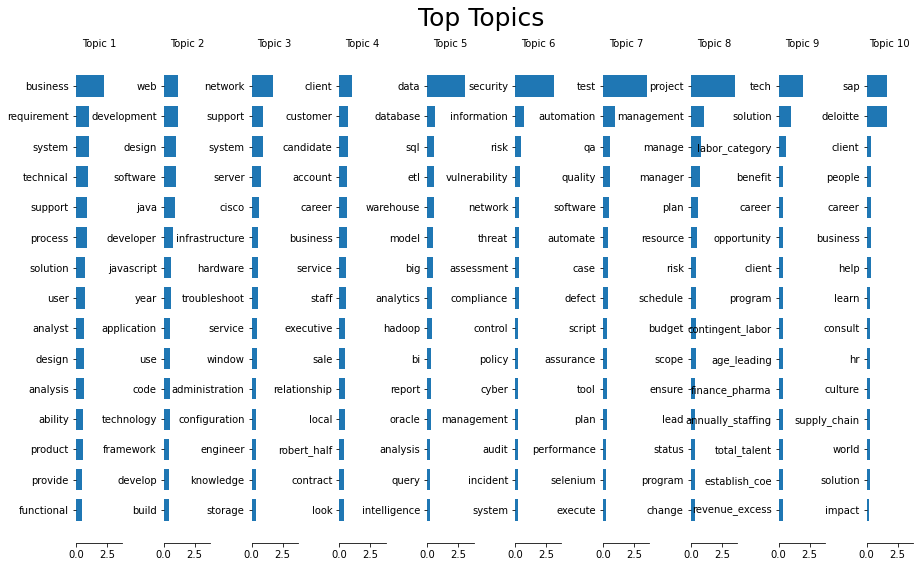

In [ ]:
topic_word_plot()

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
def get_topics(W, feature_names, num_topics, num_words):
    topics = []
    for topic_idx, topic in enumerate(W):
        topic_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        topics.append(topic_words)
    return topics

## GENSIM LDA - Final model

In [ ]:
import gensim

In [ ]:
from gensim import corpora, models

In [ ]:
dictionary = corpora.Dictionary(new_df['bigramtexts'])

In [ ]:
new_df['bigramtexts']

0        [look, selenium, engineer, solid, java, cod, s...
1        [university, chicago, rapidly, grow, security,...
2        [day, solution, affect, people, world, fortune...
3        [java, il, client, lead, edge, software, devel...
4        [midtown, base, high, tech, firm, immediate, i...
                               ...                        
21995    [search, talented, creative, share, passion, b...
21996    [san_francisco, caterm, full, time, permanent,...
21997    [take_pride, know, thousand, live, positively,...
21998    [offer, youas, world, lead, digital, english, ...
21999    [programmingdevelopment, program, win, use, de...
Name: bigramtexts, Length: 21542, dtype: object

In [ ]:
dictionary.token2id

{'ab_initio': 0,
 'ability': 1,
 'able': 2,
 'accountability': 3,
 'adopt': 4,
 'advance': 5,
 'aid': 6,
 'analytical': 7,
 'analyze': 8,
 'application': 9,
 'aptitude': 10,
 'associate': 11,
 'assure': 12,
 'automated': 13,
 'automation': 14,
 'basis': 15,
 'batch': 16,
 'best': 17,
 'bourne': 18,
 'break': 19,
 'build': 20,
 'challenge': 21,
 'client': 22,
 'cobol': 23,
 'cod': 24,
 'collaborate': 25,
 'commerce': 26,
 'communication': 27,
 'competency': 28,
 'complex': 29,
 'comprehensive': 30,
 'compute': 31,
 'contribute': 32,
 'coordinate': 33,
 'create': 34,
 'critical': 35,
 'cut_edge': 36,
 'data': 37,
 'database': 38,
 'debug': 39,
 'design': 40,
 'desire': 41,
 'developer': 42,
 'development': 43,
 'dissect': 44,
 'eagerness': 45,
 'effort': 46,
 'engineer': 47,
 'engineering': 48,
 'ensure': 49,
 'environment': 50,
 'ethic': 51,
 'etl': 52,
 'excellent': 53,
 'execution': 54,
 'exist': 55,
 'expect': 56,
 'expert': 57,
 'flexible': 58,
 'follow': 59,
 'forefront': 60,
 'fra

In [ ]:
corpus = [dictionary.doc2bow(word) for word in new_df['bigramtexts']]

In [ ]:
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)

In [ ]:
print(ldamodel.print_topics(num_topics=5,num_words=5))

[(8, '0.036*"network" + 0.027*"system" + 0.021*"support" + 0.017*"server" + 0.013*"infrastructure"'), (7, '0.031*"project" + 0.028*"business" + 0.018*"management" + 0.012*"technical" + 0.011*"process"'), (2, '0.029*"client" + 0.012*"service" + 0.011*"business" + 0.010*"solution" + 0.010*"technology"'), (9, '0.043*"data" + 0.017*"product" + 0.010*"technology" + 0.010*"software" + 0.010*"design"'), (5, '0.032*"development" + 0.026*"design" + 0.020*"web" + 0.018*"software" + 0.016*"year"')]


### PyLDAvis Visual

In [ ]:
import pyLDAvis


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [ ]:
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(ldamodel,corpus,dictionary,mds='nmds',R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.151521 -0.032836       1        1  28.150408
0     -0.131579 -0.060713       2        1  17.015061
3     -0.113319 -0.111959       3        1  15.407749
8     -0.121144 -0.123267       4        1  11.934289
6     -0.067275  0.198005       5        1  10.583995
1     -0.016411  0.211287       6        1   6.409507
7     -0.022370  0.169192       7        1   4.774788
5      0.041886 -0.224292       8        1   2.853805
2      0.129844 -0.002698       9        1   2.531060
4      0.451890 -0.022718      10        1   0.339337, topic_info=            Term          Freq         Total Category  logprob  loglift
261     security  15284.000000  15284.000000  Default  30.0000  30.0000
37          data  27680.000000  27680.000000  Default  29.0000  29.0000
40        design  28626.000000  28626.000000  Default  28.0000  28.0000
119      product  15744.000000  15744.000000  Default  27.0000  27.0000
283     business  37210.000000  37210.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
641      unified     39.929295    156.848852  Topic10  -5.7345   4.3178
4228     absence     33.076926     81.621260  Topic10  -5.9228   4.7827
848   functional     68.569198   5512.895174  Topic10  -5.1938   1.2989
2191      portal     32.804660    640.429329  Topic10  -5.9311   2.7144
1623       labor     29.892074    178.332443  Topic10  -6.0241   3.8999

[805 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
7659      10  0.995750     abap
1          1  0.577266  ability
1          2  0.135247  ability
1          3  0.147229  ability
1          4  0.080382  ability
...      ...       ...      ...
185        9  0.000342     year
73517     10  0.961333        去
73539     10  0.961333        矣
73554     10  0.950397        耳
73564     10  0.950397        誨

[2054 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 4, 9, 7, 2, 8, 6, 3, 5])

### Tuning - Coherence Model

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
print('\nPerplexity: ', ldamodel.log_perplexity(corpus,total_docs=10000))


Perplexity:  -7.9492958454389235


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda=CoherenceModel(model=ldamodel,texts=new_df['bigramtexts'],dictionary=dictionary,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence Socre: ',coherence_lda)


Coherence Socre:  0.4207474755557329


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=new_df['bigramtexts'], start=30, limit=60, step=5)


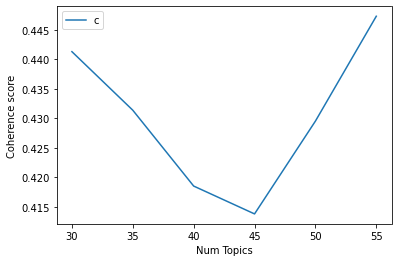

In [ ]:
# Show graph
limit=60; start=30; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 30  has Coherence Value of 0.4413
Num Topics = 35  has Coherence Value of 0.4314
Num Topics = 40  has Coherence Value of 0.4185
Num Topics = 45  has Coherence Value of 0.4138
Num Topics = 50  has Coherence Value of 0.4295
Num Topics = 55  has Coherence Value of 0.4473


In [ ]:
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(14,
  '0.013*"software" + 0.010*"look" + 0.010*"engineer" + 0.008*"benefit" + 0.007*"development" + 0.007*"time" + 0.007*"get" + 0.007*"new" + 0.007*"apply" + 0.007*"work"'),
 (27,
  '0.060*"status" + 0.040*"national_origin" + 0.033*"age" + 0.032*"regard_race" + 0.032*"qualify_applicant" + 0.032*"sexual_orientation" + 0.028*"consideration" + 0.026*"color_religion" + 0.025*"equal" + 0.021*"gender_identity"'),
 (37,
  '0.027*"web" + 0.021*"javascript" + 0.018*"design" + 0.017*"ui" + 0.014*"technology" + 0.013*"use" + 0.013*"developer" + 0.011*"development" + 0.011*"client" + 0.010*"framework"'),
 (26,
  '0.019*"business" + 0.012*"technical" + 0.012*"development" + 0.009*"support" + 0.009*"scrum" + 0.008*"project" + 0.008*"requirement" + 0.007*"client" + 0.007*"system" + 0.007*"analyst"'),
 (11,
  '0.035*"year" + 0.026*"java" + 0.021*"design" + 0.017*"development" + 0.016*"architecture" + 0.013*"solution" + 0.012*"technical" + 0.012*"use" + 0.012*"service" + 0.010*"integration"'),
 (0,


In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(optimal_model,corpus,dictionary,mds='nmds',R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
23    -0.114490 -0.043660       1        1  12.691832
36    -0.114765  0.035376       2        1   6.303397
1     -0.097012  0.029095       3        1   5.887572
4     -0.094564 -0.096069       4        1   4.707352
14    -0.030053  0.121061       5        1   4.439211
22    -0.097228  0.076948       6        1   4.406483
3     -0.031402  0.100119       7        1   4.192429
7     -0.104668 -0.089782       8        1   4.184997
25    -0.084939  0.035751       9        1   3.957315
0     -0.099487 -0.136207      10        1   3.587549
6     -0.099802 -0.115266      11        1   3.571072
13    -0.024983 -0.048549      12        1   3.318558
19    -0.080985 -0.017919      13        1   3.271162
12    -0.094725 -0.027528      14        1   3.084958
18    -0.097295 -0.034271      15        1   2.859699
26    -0.068976  0.008099      16        1   2.716576
11    -0.068440  0.051089      17        1   2.614133
20    -0.033674  0.065512      18        1   2.154309
8     -0.065223  0.036059      19        1   2.033751
37    -0.048822  0.132006      20        1   1.953245
24     0.053392  0.065397      21        1   1.893460
28     0.041286  0.167046      22        1   1.876422
2     -0.057475  0.006501      23        1   1.709071
39     0.054945  0.140924      24        1   1.489985
5      0.042779  0.086136      25        1   1.388227
31     0.003986 -0.143480      26        1   1.348902
15    -0.000117 -0.106910      27        1   1.339238
38    -0.006218 -0.125766      28        1   1.135158
9     -0.011853 -0.092731      29        1   0.907505
29     0.083412  0.040132      30        1   0.819747
17     0.056115  0.057691      31        1   0.706502
16     0.170444  0.043488      32        1   0.681635
21     0.066242  0.059929      33        1   0.605224
32     0.039272 -0.012044      34        1   0.553650
30     0.120162  0.096605      35        1   0.426561
27     0.278507 -0.078953      36        1   0.399850
34     0.095139 -0.020345      37        1   0.305251
35     0.077155 -0.093696      38        1   0.236423
33     0.138497 -0.083233      39        1   0.166545
10     0.305862 -0.088555      40        1   0.075045, topic_info=            Term          Freq         Total Category  logprob  loglift
164         test  23652.000000  23652.000000  Default  30.0000  30.0000
98       network  14884.000000  14884.000000  Default  29.0000  29.0000
37          data  27662.000000  27662.000000  Default  28.0000  28.0000
261     security  15613.000000  15613.000000  Default  27.0000  27.0000
40        design  28646.000000  28646.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
851     identity     17.162922   1095.756497  Topic40  -5.0700   3.0384
5911   inclusive      9.664726    175.173310  Topic40  -5.6443   4.2975
247      project     18.726832  34197.372385  Topic40  -4.9828  -0.3151
425   management      9.476126  28048.859800  Topic40  -5.6640  -0.7981
1266         yrs      8.519088    170.364729  Topic40  -5.7704   4.1992

[3171 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
1935      18  0.904431         ab
1935      21  0.061666         ab
0          9  0.967111  ab_initio
7659      16  0.016087       abap
7659      31  0.965221       abap
...      ...       ...        ...
1266      27  0.023479        yrs
1266      40  0.052828        yrs
15300     19  0.982972     zabbix
4578       2  0.936706       zend
4578      29  0.030216       zend

[23614 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[24, 37, 2, 5, 15, 23, 4, 8, 26, 1, 7, 14, 20, 13, 19, 27, 12, 21, 9, 38, 25, 29, 3, 40, 6, 32, 16, 39, 10, 30, 18, 17, 22, 33, 31, 28, 35, 36, 34, 11])

In [ ]:
import pickle

In [ ]:
#save model to disk
filename= 'finalgensimldamodel.sav'
pickle.dump(optimal_model,open(filename,'wb'))

## Gensim NMF Topic Modeling

In [ ]:
from gensim import corpora, models, similarities

In [ ]:
import gensim
from gensim import models, interfaces, utils
from gensim.models import Nmf

In [ ]:
nmfmodel = gensim.models.nmf.Nmf(corpus, num_topics=10, id2word=dictionary)

In [ ]:
print(nmfmodel.print_topics(num_topics=10,num_words=5))

[(0, '0.046*"development" + 0.042*"software" + 0.028*"test" + 0.026*"year" + 0.017*"design"'), (1, '0.031*"design" + 0.018*"solution" + 0.018*"technology" + 0.016*"development" + 0.014*"service"'), (2, '0.107*"project" + 0.021*"management" + 0.014*"manage" + 0.014*"manager" + 0.013*"plan"'), (3, '0.024*"product" + 0.024*"customer" + 0.013*"skill" + 0.012*"service" + 0.010*"knowledge"'), (4, '0.090*"security" + 0.024*"information" + 0.011*"risk" + 0.011*"software" + 0.010*"management"'), (5, '0.119*"data" + 0.013*"model" + 0.011*"database" + 0.011*"business" + 0.010*"year"'), (6, '0.034*"system" + 0.027*"support" + 0.026*"network" + 0.015*"technical" + 0.010*"include"'), (7, '0.057*"test" + 0.023*"system" + 0.013*"project" + 0.013*"skill" + 0.011*"management"'), (8, '0.058*"business" + 0.023*"project" + 0.022*"management" + 0.019*"process" + 0.016*"requirement"'), (9, '0.030*"business" + 0.025*"client" + 0.022*"deloitte" + 0.016*"solution" + 0.012*"sap"')]


In [ ]:
for topic_id, topic in nmfmodel.show_topics(formatted=False):
    print(f"Topic #{topic_id}: ", end='')
    print([(word, round(probability, 4)) for word, probability in topic])

Topic #0: [('development', 0.0456), ('software', 0.0418), ('test', 0.0281), ('year', 0.0256), ('design', 0.0166), ('business', 0.0136), ('requirement', 0.0128), ('develop', 0.0125), ('use', 0.0121), ('system', 0.0117)]
Topic #1: [('design', 0.0305), ('solution', 0.0181), ('technology', 0.0179), ('development', 0.0162), ('service', 0.0141), ('skill', 0.0136), ('client', 0.0131), ('technical', 0.0125), ('include', 0.0102), ('architecture', 0.0087)]
Topic #2: [('project', 0.1069), ('management', 0.0211), ('manage', 0.014), ('manager', 0.0138), ('plan', 0.0134), ('client', 0.0134), ('include', 0.0089), ('year', 0.0082), ('program', 0.008), ('resource', 0.0079)]
Topic #3: [('product', 0.0241), ('customer', 0.024), ('skill', 0.0128), ('service', 0.012), ('knowledge', 0.0102), ('build', 0.0088), ('strong', 0.0081), ('new', 0.0078), ('work', 0.0075), ('use', 0.0068)]
Topic #4: [('security', 0.0897), ('information', 0.0242), ('risk', 0.0113), ('software', 0.0108), ('management', 0.01), ('techno

### Visualization

In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim import interfaces, utils, matutils

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(nmfmodel,corpus,dictionary)
vis

AttributeError: ignored

### Coherence Score Tuning

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_nmf=CoherenceModel(model=nmfmodel,texts=new_df['bigramtexts'],dictionary=dictionary,coherence='c_v')
coherence_nmf=coherence_model_nmf.get_coherence()
print('\nCoherence Socre: ',coherence_nmf)


Coherence Socre:  0.38811674764511406


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.nmf.Nmf(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=new_df['bigramtexts'], start=35, limit=70, step=5)


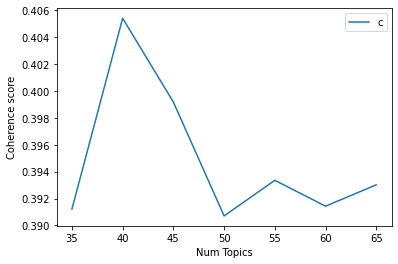

In [ ]:
# Show graph
limit=70; start=35; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 40  has Coherence Value of 0.4177
Num Topics = 45  has Coherence Value of 0.4364
Num Topics = 50  has Coherence Value of 0.4376
Num Topics = 55  has Coherence Value of 0.4241


In [ ]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(38,
  '0.027*"business" + 0.026*"client" + 0.020*"career" + 0.017*"offer" + 0.014*"consult" + 0.012*"help" + 0.011*"service" + 0.011*"technology" + 0.011*"benefit" + 0.011*"company"'),
 (2,
  '0.014*"look" + 0.012*"software" + 0.012*"engineer" + 0.011*"developer" + 0.010*"apply" + 0.009*"benefit" + 0.009*"technology" + 0.008*"new" + 0.008*"development" + 0.008*"join"'),
 (31,
  '0.077*"medical" + 0.074*"clinical" + 0.072*"healthcare" + 0.070*"health" + 0.054*"care" + 0.042*"patient" + 0.034*"hyperion" + 0.026*"hospital" + 0.024*"health_care" + 0.012*"physician"'),
 (17,
  '0.016*"product" + 0.016*"customer" + 0.013*"technology" + 0.011*"software" + 0.010*"service" + 0.009*"engineering" + 0.008*"development" + 0.008*"technical" + 0.008*"new" + 0.007*"skill"'),
 (36,
  '0.033*"system" + 0.021*"linux" + 0.019*"management" + 0.015*"infrastructure" + 0.010*"network" + 0.010*"operation" + 0.009*"environment" + 0.009*"knowledge" + 0.008*"performance" + 0.008*"include"'),
 (41,
  '0.026*"sha

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(optimal_model,corpus,dictionary,mds='nmds',R=30)
vis

AttributeError: ignored

In [ ]:
matrix = new_df['bigramtexts'].apply(lambda x: ldamodel.get_term_topics(x, minimum_probability= 0))
dense = gensim.matutils.spare2full(matrix, ldamodel.num_topics)
df = pd.DataFrame(dense, columns = [i for i in range(ldamodel.num_topics)])

IndexError: ignored

# NLTK LDA

In [ ]:
lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50)


In [ ]:
for topic in lda.show_topics(num_topics=10, num_words=10):
    print(topic)

(0, '0.086*"sap" + 0.047*"solution" + 0.045*"tech" + 0.025*"sharepoint" + 0.016*"client" + 0.011*"multiple" + 0.010*"benefit" + 0.010*"opportunity" + 0.010*"program" + 0.009*"career"')
(1, '0.025*"project" + 0.022*"business" + 0.016*"management" + 0.012*"technical" + 0.011*"process" + 0.011*"system" + 0.010*"support" + 0.010*"requirement" + 0.010*"ability" + 0.010*"skill"')
(2, '0.032*"development" + 0.022*"design" + 0.021*"software" + 0.019*"web" + 0.017*"year" + 0.015*"java" + 0.013*"use" + 0.013*"developer" + 0.012*"technology" + 0.012*"application"')
(3, '0.036*"design" + 0.024*"engineering" + 0.016*"medical" + 0.015*"electrical" + 0.014*"clinical" + 0.013*"equipment" + 0.013*"embed" + 0.011*"manufacture" + 0.010*"device" + 0.010*"mechanical"')
(4, '0.024*"client" + 0.019*"business" + 0.018*"service" + 0.014*"technology" + 0.012*"solution" + 0.009*"customer" + 0.009*"sale" + 0.009*"development" + 0.008*"provide" + 0.008*"career"')
(5, '0.024*"product" + 0.013*"design" + 0.012*"soft

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.169372  0.004538       1        1  31.871716
6      0.123595  0.053446       2        1  15.785617
2      0.155795  0.090701       3        1  15.200962
4      0.076379 -0.160189       4        1  11.990855
5      0.098383 -0.020516       5        1   9.142118
9     -0.031091 -0.247094       6        1   5.323296
8      0.059656  0.164412       7        1   4.448607
7     -0.010571  0.070924       8        1   4.232743
0     -0.288632 -0.132960       9        1   1.050784
3     -0.352887  0.176738      10        1   0.953302, topic_info=            Term          Freq         Total Category  logprob  loglift
37          data  27539.000000  27539.000000  Default  30.0000  30.0000
164         test  24505.000000  24505.000000  Default  29.0000  29.0000
151     solution  22766.000000  22766.000000  Default  28.0000  28.0000
40        design  28619.000000  28619.000000  Default  27.0000  27.0000
22        client  23549.000000  23549.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1035    hardware    265.379549   3780.855044  Topic10  -4.8734   1.9964
47      engineer    285.266376   9706.327801  Topic10  -4.8012   1.1259
530     facility    182.689013    671.527591  Topic10  -5.2468   3.3512
1245  validation    180.986389   1033.775463  Topic10  -5.2562   2.9104
160       system    195.638133  35612.349397  Topic10  -5.1783  -0.5512

[796 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7659      9  0.997052     abap
1         1  0.614342  ability
1         2  0.134721  ability
1         3  0.111588  ability
1         4  0.075788  ability
...     ...       ...      ...
185       5  0.037540     year
185       6  0.109270     year
185       7  0.064098     year
185       8  0.031738     year
185       9  0.001969     year

[1867 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 5, 6, 10, 9, 8, 1, 4])

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_nltklda=CoherenceModel(model=lda,texts=new_df['bigramtexts'],dictionary=dictionary,coherence='c_v')
coherence_nltklda=coherence_model_nltklda.get_coherence()
print('\nCoherence Socre: ',coherence_nltklda)


Coherence Socre:  0.4276818845207826


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=40, step=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=new_df['bigramtexts'], start=40, limit=60, step=5)


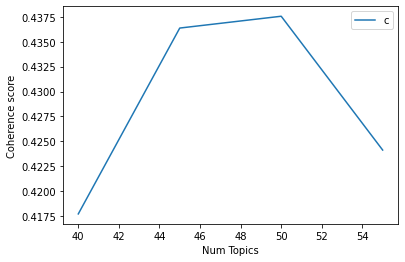

In [ ]:
# Show graph
limit=60; start=40; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 40  has Coherence Value of 0.4177
Num Topics = 45  has Coherence Value of 0.4364
Num Topics = 50  has Coherence Value of 0.4376
Num Topics = 55  has Coherence Value of 0.4241


In [ ]:
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics()

[(38,
  '0.034*"deloitte" + 0.017*"learn" + 0.017*"career" + 0.011*"hr" + 0.011*"help" + 0.010*"client" + 0.009*"opportunity" + 0.008*"organization" + 0.008*"community" + 0.008*"job"'),
 (13,
  '0.072*"tech" + 0.058*"solution" + 0.020*"client" + 0.015*"multiple" + 0.014*"opportunity" + 0.014*"benefit" + 0.013*"program" + 0.013*"include" + 0.013*"career" + 0.013*"telecom"'),
 (46,
  '0.081*"campaign" + 0.072*"drupal" + 0.038*"seo" + 0.035*"cm" + 0.026*"instructional" + 0.022*"sitecore" + 0.018*"copywriting" + 0.017*"content" + 0.014*"lamp" + 0.012*"marketing"'),
 (43,
  '0.081*"security" + 0.024*"information" + 0.015*"management" + 0.014*"system" + 0.013*"risk" + 0.010*"compliance" + 0.009*"control" + 0.009*"audit" + 0.008*"include" + 0.008*"technology"'),
 (15,
  '0.019*"clearance" + 0.017*"engineering" + 0.015*"sacramento" + 0.013*"qualification" + 0.012*"video" + 0.011*"guidewire" + 0.011*"system" + 0.010*"digital" + 0.009*"content" + 0.009*"year"'),
 (26,
  '0.034*"apply" + 0.019*"a

In [ ]:
len(model_topics)

10

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(optimal_model,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.155605  0.032549       1        1  7.471151
17     0.143973 -0.036909       2        1  7.050045
12     0.135288  0.105715       3        1  6.848233
23     0.153445  0.016863       4        1  6.248004
20     0.143753  0.101364       5        1  5.261233
42     0.141492  0.025863       6        1  5.210557
5      0.142164  0.059226       7        1  4.575406
39     0.122781 -0.078176       8        1  4.402151
25     0.134661 -0.007082       9        1  4.260829
16     0.118966  0.024837      10        1  4.017809
2      0.106035 -0.157012      11        1  3.756611
1      0.111363  0.132896      12        1  3.155315
38     0.077975 -0.125309      13        1  3.016408
3      0.091447  0.047953      14        1  2.912148
11     0.104678  0.124320      15        1  2.857328
43     0.113105  0.001146      16        1  2.800093
19     0.105283 -0.112667      17        1  2.391776
36     0.101508  0.132239      18        1  2.057988
22     0.097376 -0.065673      19        1  2.036473
44     0.070520 -0.129343      20        1  2.032473
37     0.087455  0.074321      21        1  2.008501
4      0.094645 -0.041533      22        1  1.901980
30     0.094930 -0.046498      23        1  1.823922
24     0.089566 -0.079529      24        1  1.666210
28    -0.021355 -0.232961      25        1  1.069165
41     0.077047  0.034858      26        1  1.055929
26     0.060505  0.045268      27        1  1.016515
33     0.063032  0.039987      28        1  0.994769
7      0.039194 -0.039108      29        1  0.962046
10     0.064230  0.034952      30        1  0.959410
9      0.011786  0.007110      31        1  0.909533
40    -0.034753 -0.150580      32        1  0.768780
13     0.060088  0.067307      33        1  0.676843
27    -0.040213  0.101883      34        1  0.568935
21    -0.199857 -0.001763      35        1  0.246042
31    -0.298431 -0.015779      36        1  0.202003
29    -0.210872  0.032841      37        1  0.177272
32    -0.125315 -0.055817      38        1  0.173844
14    -0.245979 -0.009801      39        1  0.090082
6     -0.226884  0.031807      40        1  0.088003
0     -0.317460  0.049123      41        1  0.087545
35    -0.313379 -0.024412      42        1  0.078783
8     -0.341272  0.064385      43        1  0.047065
34    -0.354128  0.004462      44        1  0.034183
15    -0.383997  0.016676      45        1  0.030607, topic_info=            Term          Freq         Total Category  logprob  loglift
247      project  33870.000000  33870.000000  Default  30.0000  30.0000
37          data  28284.000000  28284.000000  Default  29.0000  29.0000
164         test  23553.000000  23553.000000  Default  28.0000  28.0000
261     security  15968.000000  15968.000000  Default  27.0000  27.0000
98       network  14906.000000  14906.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1375    physical      1.621093   1170.288970  Topic45  -6.5328   1.5098
1357  electrical      1.043737    817.376737  Topic45  -6.9731   1.4284
40        design      1.895887  29296.348351  Topic45  -6.3762  -1.5538
247      project      1.009094  33870.607833  Topic45  -7.0068  -2.3295
160       system      0.977817  36616.431906  Topic45  -7.0383  -2.4390

[3333 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
8855       5  0.935982         aa
0         10  0.983206  ab_initio
7659       5  0.004870       abap
7659      20  0.004870       abap
7659      23  0.983816       abap
...      ...       ...        ...
6694      11  0.951295     youyou
10448      8  0.918392        yui
10169     18  0.913800          z
15300     18  0.983323     zabbix
12147     20  0.939069     zephyr

[24190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 18, 13, 24, 

# Recommendation System

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
userinput=input()

VICKIE YANG   New York, NY |973-566-4497 | tq20018@gmail.com | LinkedIn: https://ca.linkedin.com/in/yangvickie    Human capital professional with 5+ years of experience in recruitment, talent management, and people analytics. Strong passion and proven ability to use data-driven insights to analyze key HR metrics, improve HR processes and increase employee engagement. Seeking an opportunity to utilize my skills and make a real impact in a challenging and dynamic role.  Familiar with : ADP|Deltek|Oracle|Workday|Taleo|PeopleSoft|Unifocu|Tableau|PowerBI Skills: Python, SQL, Excel, Data Science, Prediction Modeling, NLP, Data Storytelling, HR Metrics    Flatiron School, Data Science Boot Camp, 10/22 - 02/23						  New York, USA  New York University, Master of Science, GPA 3.8							  New York, USA                                                             Human Capital Management, concentration: Organizational Effectiveness					         2020 - 2022  University of Waterloo, Honors Bachelor 

In [ ]:
def input_process(text):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    txt_lower = text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    txt_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", txt_lower).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
    #remove words with short length
    
    # remove stop words and punctuations 
    txt_norm = [x for x in word_tokenize(txt_lower) if ((x.isalpha()) & (x not in stop_words)) & (x not in ['good','great','found','company','lot','experience','fit','candidate','applicant','requirement','qualification','Deloitte','professional','year','application','opportunity','description','work','role','need','email','delivery',"req_id","job_req","req","id","please","resume","position","forward","receive","contact","minimum","required","disability","eligibility","employment","team","click"])]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    txt_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(txt_norm))) 

    # lemmatize the input
    txt_processed = [wnl.lemmatize(x[0], x[1]) for x in txt_tagged if x[1] is not None]
    return txt_processed
    
    



In [ ]:
userresume=input_process(userinput)

In [ ]:
# Build the bigram and trigram models
bigramtext = gensim.models.Phrases(userresume, min_count=5, threshold=150) # higher threshold fewer phrases.
bigram_modtext = gensim.models.phrases.Phraser(bigramtext)


In [ ]:
import gensim
from gensim import corpora, models

In [ ]:
dictionary_user = corpora.Dictionary([bigramed.split])

In [ ]:
user_corpus = [dictionary_user.doc2bow([word]) for word in bigramed]

unigram test

In [ ]:
dictionary_user_unigram = corpora.Dictionary([userresume])
unigram_user_corpus = [dictionary_user_unigram.doc2bow([word]) for word in bigramed]

Based on Parveen's code:

In [ ]:
from gensim.similarities import MatrixSimilarity

In [ ]:
jdmatrix = optimal_model[[x for x in corpus]]

In [ ]:
index = similarities.MatrixSimilarity(jdmatrix)

In [ ]:
usermatix=optimal_model[[word for word in unigram_user_corpus]]

In [ ]:
userindex=similarities.MatrixSimilarity(usermatix)

In [ ]:
test=index[usermatix]

In [ ]:
test_df = pd.DataFrame(test,columns=new_df['jobtitle'])

In [ ]:
test_df=test_df.transpose()

In [ ]:
test_df['total']=test_df.sum(axis = 1)

In [ ]:
test_df=test_df.sort_values(by=['total'])

In [ ]:
sorted_val_df = pd.Series(usermatix).sort_values(ascending = False).to_frame(name = "similarity")


In [ ]:
optimal_model[[word for word in unigram_user_corpus]]

In [ ]:
sorted_val_df['similarity'].[1][1][1]

0.0111113805

In [ ]:
sorted_val_df['total']=sorted_val_df['similarity'].apply(lambda x : (np.array([topic[1] for topic in x]).sum()))

In [ ]:
sorted_val_df.total.unique()

array([0.99999994, 0.9999999 , 1.0000001 , 1.        , 0.99999976,
       0.9999998 , 1.0000002 , 0.9999997 , 0.99999964], dtype=float32)

In [ ]:
sorted_val_df.head()

similarity  \
6    [(0, 0.51110935), (1, 0.011111151), (2, 0.0111...   
70   [(0, 0.51110935), (1, 0.0111111505), (2, 0.011...   
479  [(0, 0.022222223), (1, 0.022222223), (2, 0.022...   
0    [(0, 0.022222223), (1, 0.022222223), (2, 0.022...   
7    [(0, 0.022222223), (1, 0.022222223), (2, 0.022...   

                                                  name     total  
6                                     Network Engineer  0.022222  
70               Software Infrastructure C++ Developer  0.022222  
479  Strategy Consulting - Human Capital - HR Trans...  0.022222  
0                             AUTOMATION TEST ENGINEER  0.022222  
7    Sr. Web Application Developer (Cloud Team) - C...  0.022222

In [ ]:
sorted_val_df['name'] = new_df.iloc[sorted_val_df.index].jobtitle.values

In [ ]:
sorted_val_df.name[0: 20]

6                                       Network Engineer
70                 Software Infrastructure C++ Developer
479    Strategy Consulting - Human Capital - HR Trans...
0                               AUTOMATION TEST ENGINEER
7      Sr. Web Application Developer (Cloud Team) - C...
466                 Marketing/Communications Coordinator
427    Senior Developer - HEAVILYFunded, Revolutionar...
475    Lead UX Designer - UX design, JavaScript/HTML/...
208                 Business Intelligence Developer (IT)
493    Senior Software Engineer (C++, C# and ASP.NET,...
230          Software Team Lead - Microsoft Technologies
564                        Salesforce Solution Architect
315          Information Systems Security Engineer-CISSP
102    Sr. Systems Engineer - Storage (Contract-to-Hire)
306    Senior Network Engineer- BGP, IP Network Desig...
157    Developer - AngularJS,Angular, Bootstrap, Node...
370                                  SAP Cash Management
281                            

In [ ]:
def recommend_from_text(self, text, num_rec = 10):
  tokenized = self.tokenize_text(text)        
  bow_vec = self.dictionary.doc2bow(tokenized)        
  sims = self.index_sim[self.scotch_topic_model[bow_vec]]
  sorted_val_df = pd.Series(sims).sort_values(ascending = False).to_frame(name = "similarity")
  sorted_val_df['name'] = self.full_data.iloc[sorted_val_df.index].name.values
  return sorted_val_df.name[0: num_rec]
